In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2
Num GPUs Available:  1


In [ ]:
PATH = "C:\\Users\\hadia\\Desktop\\GOALS\\VeeSmart internship\\Yelp Dataset\\Yelp Dataset\\yelp_academic_dataset_review.json"

In [ ]:
#1000000
df=pd.read_json(PATH, lines=True, nrows=100000)
df.head(2)

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,lWC-xP3rd6obsecCYsGZRg,ak0TdVmGKo4pwqdJSTLwWw,buF9druCkbuXLX526sGELQ,4,3,1,1,Apparently Prides Osteria had a rough summer a...,2014-10-11 03:34:02
1,8bFej1QE5LXp4O05qjGqXA,YoVfDbnISlW0f7abNQACIg,RA4V8pr014UyUbDvI-LW2A,4,1,0,0,This store is pretty good. Not as great as Wal...,2015-07-03 20:38:25


In [ ]:
df.describe()

,stars,useful,funny,cool
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,3.777250,0.989390,0.336430,0.375620
std,1.376391,2.129099,1.212221,1.205016
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,0.000000,0.000000
75%,5.000000,1.000000,0.000000,0.000000
max,5.000000,128.000000,42.000000,47.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   review_id    100000 non-null  object        
 1   user_id      100000 non-null  object        
 2   business_id  100000 non-null  object        
 3   stars        100000 non-null  int64         
 4   useful       100000 non-null  int64         
 5   funny        100000 non-null  int64         
 6   cool         100000 non-null  int64         
 7   text         100000 non-null  object        
 8   date         100000 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 6.9+ MB


In [ ]:
df.isnull().sum()

review_id      0
user_id        0
business_id    0
stars          0
useful         0
funny          0
cool           0
text           0
date           0
dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.corr()

,stars,useful,funny,cool
stars,1.000000,-0.106272,-0.080097,0.061505
useful,-0.106272,1.000000,0.540111,0.647666
funny,-0.080097,0.540111,1.000000,0.664339
cool,0.061505,0.647666,0.664339,1.000000


<AxesSubplot:>

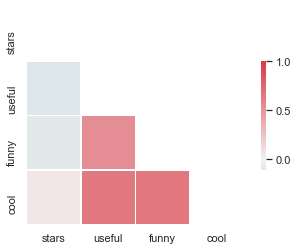

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

corr=df.corr()
sns.set(style="white")
mask=np.zeros_like(corr,dtype=bool)
mask[np.triu_indices_from(mask)]=True

# Set up the matplotlib figure
f, ax = plt.subplots()

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

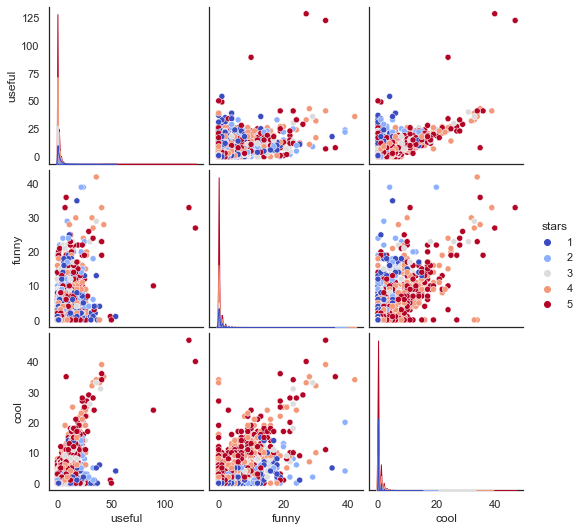

In [ ]:
sns.pairplot(df, hue='stars', palette='coolwarm')

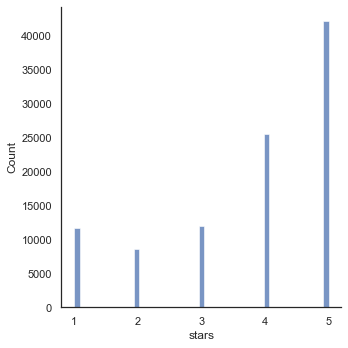

In [ ]:
sns.displot(df["stars"])

Text(0.5, 1.0, 'Ratings vs Year ')

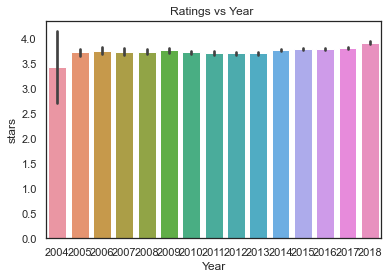

In [ ]:
df.set_index('date').head(1)
df["Year"] = pd.to_datetime(df["date"]).dt.year
sns.barplot(x=df["Year"], y=df["stars"], data=df)
plt.title("Ratings vs Year ")

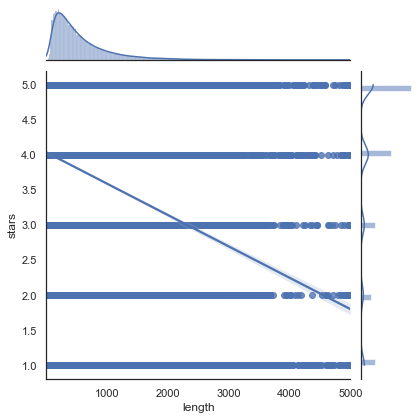

In [ ]:
import matplotlib.pyplot as plt
df.set_index('date').head(1)

df["hour"] = pd.to_datetime(df["date"]).dt.hour
df["day"] = pd.to_datetime(df["date"]).dt.day
df["month"] = pd.to_datetime(df["date"]).dt.month
df["year"] = pd.to_datetime(df["date"]).dt.year


df["length"] = df["text"].apply(len)
sns.jointplot(x=df["length"],
              y=df["stars"],
              data=df, kind='reg')

In [ ]:
df.head(2)

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,Year,hour,day,month,year,length
0,lWC-xP3rd6obsecCYsGZRg,ak0TdVmGKo4pwqdJSTLwWw,buF9druCkbuXLX526sGELQ,4,3,1,1,Apparently Prides Osteria had a rough summer a...,2014-10-11 03:34:02,2014,3,11,10,2014,1856
1,8bFej1QE5LXp4O05qjGqXA,YoVfDbnISlW0f7abNQACIg,RA4V8pr014UyUbDvI-LW2A,4,1,0,0,This store is pretty good. Not as great as Wal...,2015-07-03 20:38:25,2015,20,3,7,2015,701


In [ ]:
print('Total reviews :',len(df),'Unique restaurants :',len(df['business_id'].unique()))

Total reviews : 100000 Unique restaurants : 11223


In [ ]:
df_balanced= df[['user_id','business_id','stars','useful','funny','cool','text','date','year','month','day','hour']].copy()

In [ ]:
df_balanced['text_length_char']= df_balanced['text'].apply(len)

Text(0.5, 1.09, 'Variation of text length according to stars')

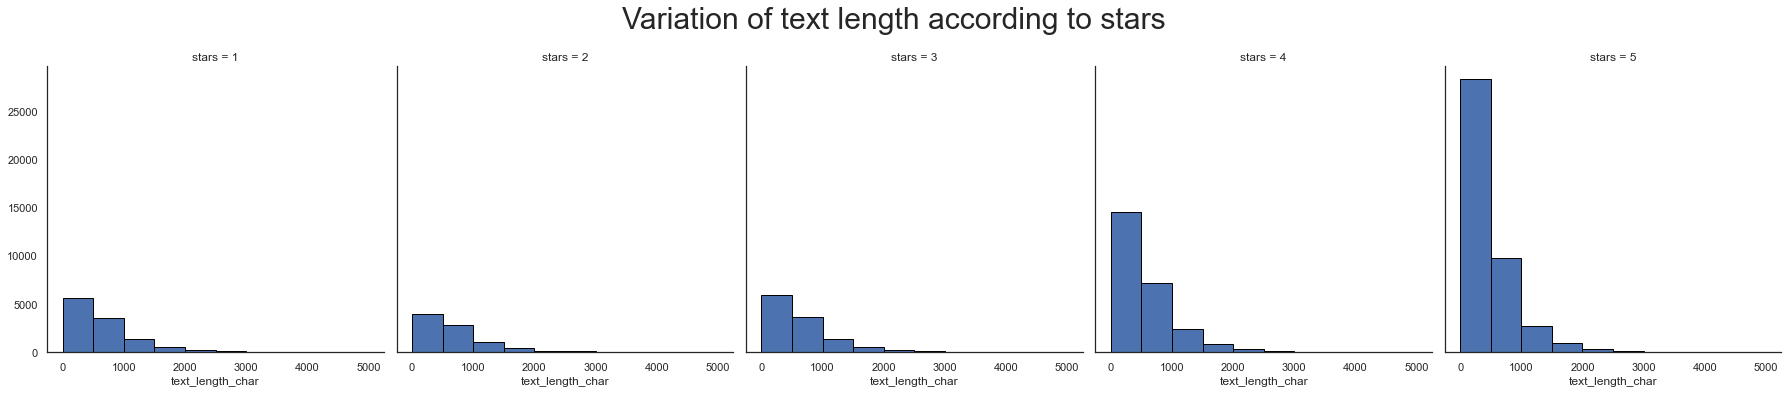

In [ ]:
Grid= sns.FacetGrid(df_balanced,col='stars',height=5)
Grid.map(plt.hist,'text_length_char',edgecolor='black',range=(0,df_balanced['text_length_char'].max()))
Grid.fig.suptitle("Variation of text length according to stars", size=30,y=1.09)

Text(0.5, 1.0, 'Co-relation between stars and outliers')

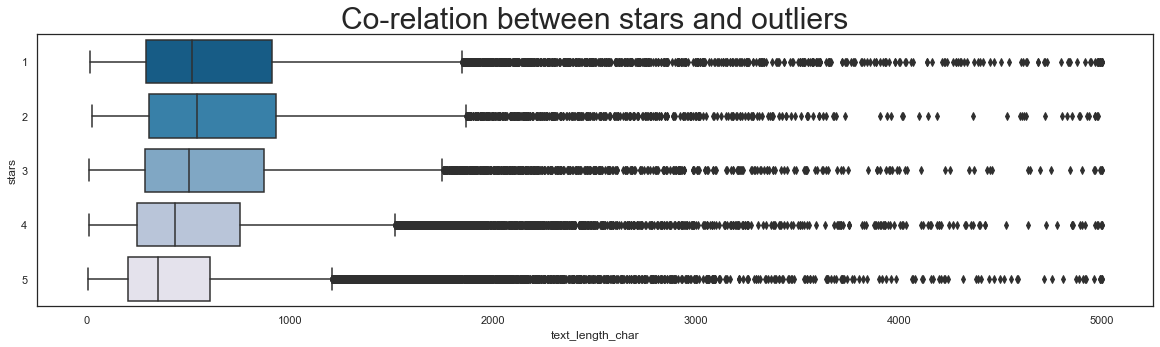

In [ ]:
plt.figure(figsize=(20,5))
sns.boxplot(data=df_balanced,y='stars',x='text_length_char',orient='h',palette='PuBu_r')
plt.title('Co-relation between stars and outliers',fontsize=30)

In [ ]:
df_balanced.groupby('stars').mean()

,useful,funny,cool,year,month,day,hour,text_length_char
stars,,,,,,,,
1,1.623170,0.514045,0.179350,2014.858784,6.373766,15.975826,12.525792,725.747361
2,1.222595,0.486586,0.251388,2014.089385,6.351873,15.932239,12.650093,719.618756
3,0.888310,0.382936,0.351444,2013.574824,6.365385,16.051478,12.600857,669.499664
4,0.899933,0.336990,0.486150,2013.613133,6.358500,16.038906,12.686792,586.310348
5,0.847699,0.242691,0.395703,2014.796742,6.341190,16.000664,12.933204,485.563773


In [ ]:
df_balanced.head(2)

,user_id,business_id,stars,useful,funny,cool,text,date,year,month,day,hour,text_length_char
0,ak0TdVmGKo4pwqdJSTLwWw,buF9druCkbuXLX526sGELQ,4,3,1,1,Apparently Prides Osteria had a rough summer a...,2014-10-11 03:34:02,2014,10,11,3,1856
1,YoVfDbnISlW0f7abNQACIg,RA4V8pr014UyUbDvI-LW2A,4,1,0,0,This store is pretty good. Not as great as Wal...,2015-07-03 20:38:25,2015,7,3,20,701


In [ ]:
df_date_c = df_balanced.drop('date',axis=1)
df_date_c.head(2)

,user_id,business_id,stars,useful,funny,cool,text,year,month,day,hour,text_length_char
0,ak0TdVmGKo4pwqdJSTLwWw,buF9druCkbuXLX526sGELQ,4,3,1,1,Apparently Prides Osteria had a rough summer a...,2014,10,11,3,1856
1,YoVfDbnISlW0f7abNQACIg,RA4V8pr014UyUbDvI-LW2A,4,1,0,0,This store is pretty good. Not as great as Wal...,2015,7,3,20,701


In [ ]:
PATH2 = 'C:\\Users\\hadia\\Desktop\\GOALS\\VeeSmart internship\\Yelp Dataset\\Yelp Dataset\\yelp_academic_dataset_business.json'
df_business=pd.read_json(PATH2, lines=True)
df_business.head(2)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,921 Pearl St,Boulder,CO,80302,40.017544,-105.283348,4.0,86,1,"{'RestaurantsTableService': 'True', 'WiFi': 'u...","Gastropubs, Food, Beer Gardens, Restaurants, B...","{'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0'..."
1,tCbdrRPZA0oiIYSmHG3J0w,Flying Elephants at PDX,7000 NE Airport Way,Portland,OR,97218,45.588906,-122.593331,4.0,126,1,"{'RestaurantsTakeOut': 'True', 'RestaurantsAtt...","Salad, Soup, Sandwiches, Delis, Restaurants, C...","{'Monday': '5:0-18:0', 'Tuesday': '5:0-17:0', ..."


In [ ]:
data = df_date_c.merge(df_business[['categories','business_id']],how='left',on='business_id')
data.head(2)

,user_id,business_id,stars,useful,funny,cool,text,year,month,day,hour,text_length_char,categories
0,ak0TdVmGKo4pwqdJSTLwWw,buF9druCkbuXLX526sGELQ,4,3,1,1,Apparently Prides Osteria had a rough summer a...,2014,10,11,3,1856,"Restaurants, Wine Bars, Nightlife, Farmers Mar..."
1,YoVfDbnISlW0f7abNQACIg,RA4V8pr014UyUbDvI-LW2A,4,1,0,0,This store is pretty good. Not as great as Wal...,2015,7,3,20,701,"Department Stores, Optometrists, Home & Garden..."


In [ ]:
import nltk
# download Punkt Sentence Tokenizer
nltk.download('punkt')
# download stopwords
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hadia\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hadia\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
def create_corpus(df,text):
    """Create words list"""
    import itertools  
    corpus=[]
    for x in df[text].str.split():
        corpus.append(x)
    merged = list(itertools.chain.from_iterable(corpus))
    return merged

In [ ]:
from nltk.corpus import stopwords
english_stopwords = stopwords.words('english')
print(english_stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

<BarContainer object of 10 artists>

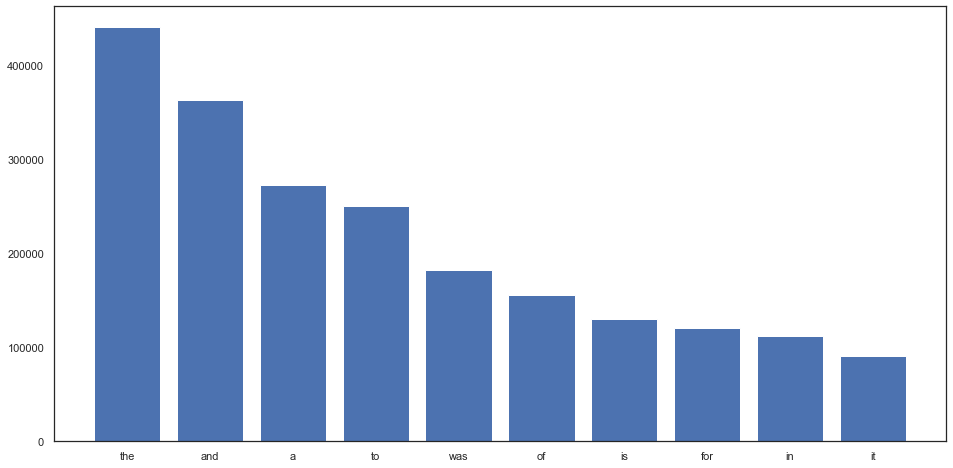

In [ ]:
from collections import defaultdict
corpus = create_corpus(data, "text")
S = defaultdict(int)
for word in corpus:
    if word in english_stopwords:
        S[word] += 1

top10S = sorted(S.items() , key = lambda x: x[1], reverse = True)[:10]

x0, y0 = zip(*top10S)

plt.figure(figsize=(16, 8))
plt.bar(x0, y0)

<BarContainer object of 10 artists>

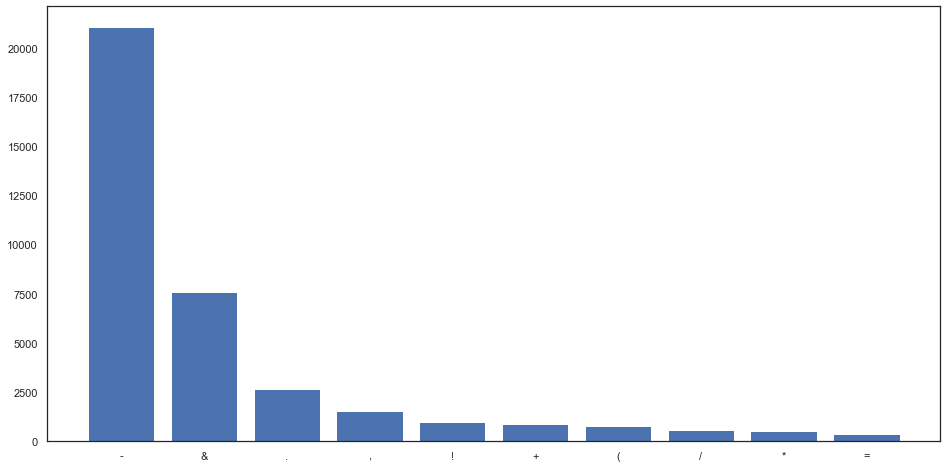

In [ ]:
import string
P = defaultdict(int) 
for punct in corpus:
    if punct in string.punctuation:
        P[punct] += 1
        
top10P = sorted(P.items() , key = lambda x: x[1], reverse = True)[:10]

x0, y0 = zip(*top10P)

plt.figure(figsize=(16, 8))
plt.bar(x0, y0)

In [ ]:
import re

def remove_html(text):
    html = re.compile(r"<,*?>")
    return html.sub(r"",text)

def remove_URL(text):
    url = re.compile(r"https?://\S+|www\.\S+")
    return url.sub(r"", text)

def remove_emoji(string):
    emoji_pattern = re.compile(
        "["
        u"\U0001F600-\U0001F64F"  #emoticons
        u"\U0001F300-\U0001F5FF"  #symbols & pictographs
        u"\U0001F680-\U0001F6FF"  #transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  #flags (IOS)
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        "]+",
        flags = re.UNICODE,
    )
    return emoji_pattern.sub(r"", string)

def remove_punct(text):
    table = str.maketrans("", "", string.punctuation)
    return text.translate(table)

def remove_stopwords(text):
    text = [word.lower() for word in text.split() if word.lower() not in english_stopwords]
    return " ".join(text)

In [ ]:
data["clean_text"] = data["text"]
data["clean_text"] = data.clean_text.map(lambda x: remove_html(x))
data["clean_text"] = data.clean_text.map(lambda x: remove_URL(x))
data["clean_text"] = data.clean_text.map(lambda x: remove_emoji(x))
data["clean_text"] = data.clean_text.map(lambda x: remove_punct(x))
data["clean_text"] = data.clean_text.map(lambda x: remove_stopwords(x))
data.head(2)

,user_id,business_id,stars,useful,funny,cool,text,year,month,day,hour,text_length_char,categories,clean_text
0,ak0TdVmGKo4pwqdJSTLwWw,buF9druCkbuXLX526sGELQ,4,3,1,1,Apparently Prides Osteria had a rough summer a...,2014,10,11,3,1856,"Restaurants, Wine Bars, Nightlife, Farmers Mar...",apparently prides osteria rough summer evidenc...
1,YoVfDbnISlW0f7abNQACIg,RA4V8pr014UyUbDvI-LW2A,4,1,0,0,This store is pretty good. Not as great as Wal...,2015,7,3,20,701,"Department Stores, Optometrists, Home & Garden...",store pretty good great walmart preferred milf...


In [ ]:
from nltk.stem.porter import PorterStemmer

stemmer = PorterStemmer()

def stemming(text):
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text)

In [ ]:
data["clean_text"] = data["clean_text"].map(stemming)

In [ ]:
data[['text','clean_text']].iloc[:2]

,text,clean_text
0,Apparently Prides Osteria had a rough summer a...,appar pride osteria rough summer evidenc almos...
1,This store is pretty good. Not as great as Wal...,store pretti good great walmart prefer milford...


In [ ]:
data.dropna(inplace=True)

In [ ]:
from keras.preprocessing.text import text_to_word_sequence
def num_words(text):
    l=text_to_word_sequence(text)
    return len(l)

data['categories']=data['categories'].map(lambda x: x.lower())
data['clean_text_length']= data['clean_text'].apply(num_words)

In [ ]:
maximum_length = data['clean_text_length'].max()
mean_length = data['clean_text_length'].mean()

max_length = int((maximum_length + mean_length)//2)

print("The Max Length that will be used for the sequences is:",max_length)
data.head(2)

The Max Length that will be used for the sequences is: 283


,user_id,business_id,stars,useful,funny,cool,text,year,month,day,hour,text_length_char,categories,clean_text,clean_text_length
0,ak0TdVmGKo4pwqdJSTLwWw,buF9druCkbuXLX526sGELQ,4,3,1,1,Apparently Prides Osteria had a rough summer a...,2014,10,11,3,1856,"restaurants, wine bars, nightlife, farmers mar...",appar pride osteria rough summer evidenc almos...,174
1,YoVfDbnISlW0f7abNQACIg,RA4V8pr014UyUbDvI-LW2A,4,1,0,0,This store is pretty good. Not as great as Wal...,2015,7,3,20,701,"department stores, optometrists, home & garden...",store pretti good great walmart prefer milford...,64


In [ ]:
data["labels"]= data["stars"].apply(lambda x: 1 if x > 3  else 0)

In [ ]:
data.isna().sum()

user_id              0
business_id          0
stars                0
useful               0
funny                0
cool                 0
text                 0
year                 0
month                0
day                  0
hour                 0
text_length_char     0
categories           0
clean_text           0
clean_text_length    0
labels               0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99995 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            99995 non-null  object
 1   business_id        99995 non-null  object
 2   stars              99995 non-null  int64 
 3   useful             99995 non-null  int64 
 4   funny              99995 non-null  int64 
 5   cool               99995 non-null  int64 
 6   text               99995 non-null  object
 7   year               99995 non-null  int64 
 8   month              99995 non-null  int64 
 9   day                99995 non-null  int64 
 10  hour               99995 non-null  int64 
 11  text_length_char   99995 non-null  int64 
 12  categories         99995 non-null  object
 13  clean_text         99995 non-null  object
 14  clean_text_length  99995 non-null  int64 
 15  labels             99995 non-null  int64 
dtypes: int64(11), object(5)
memory usage: 13

In [ ]:
data.describe()

,stars,useful,funny,cool,year,month,day,hour,text_length_char,clean_text_length,labels
count,99995.000000,99995.000000,99995.000000,99995.000000,99995.000000,99995.000000,99995.000000,99995.000000,99995.000000,99995.000000,99995.000000
mean,3.777349,0.989289,0.336427,0.375629,2014.295185,6.353208,16.007480,12.758348,581.638162,55.292915,0.676984
std,1.376308,2.128804,1.212238,1.205042,2.944531,3.326500,8.928867,7.929522,529.849390,49.301185,0.467631
min,1.000000,0.000000,0.000000,0.000000,2004.000000,1.000000,1.000000,0.000000,5.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000,2013.000000,4.000000,8.000000,4.000000,238.000000,23.000000,0.000000
50%,4.000000,0.000000,0.000000,0.000000,2015.000000,6.000000,16.000000,16.000000,420.000000,40.000000,1.000000
75%,5.000000,1.000000,0.000000,0.000000,2017.000000,9.000000,24.000000,20.000000,739.000000,70.000000,1.000000
max,5.000000,128.000000,42.000000,47.000000,2018.000000,12.000000,31.000000,23.000000,5000.000000,512.000000,1.000000


In [ ]:
data

,user_id,business_id,stars,useful,funny,cool,text,year,month,day,hour,text_length_char,categories,clean_text,clean_text_length,labels
0,ak0TdVmGKo4pwqdJSTLwWw,buF9druCkbuXLX526sGELQ,4,3,1,1,Apparently Prides Osteria had a rough summer a...,2014,10,11,3,1856,"restaurants, wine bars, nightlife, farmers mar...",appar pride osteria rough summer evidenc almos...,174,1
1,YoVfDbnISlW0f7abNQACIg,RA4V8pr014UyUbDvI-LW2A,4,1,0,0,This store is pretty good. Not as great as Wal...,2015,7,3,20,701,"department stores, optometrists, home & garden...",store pretti good great walmart prefer milford...,64,1
2,eC5evKn1TWDyHCyQAwguUw,_sS2LBIGNT5NQb6PD1Vtjw,5,0,0,0,I called WVM on the recommendation of a couple...,2013,5,28,20,578,"home services, packing services, movers",call wvm recommend coupl friend use past thoug...,56,1
3,SFQ1jcnGguO0LYWnbbftAA,0AzLzHfOJgL7ROwhdww2ew,2,1,1,1,I've stayed at many Marriott and Renaissance M...,2010,1,8,2,390,"hotels, hotels & travel, restaurants, event pl...",ive stay mani marriott renaiss marriott huge d...,32,0
4,0kA0PAJ8QFMeveQWHFqz2A,8zehGz9jnxPqXtOc7KaJxA,4,0,0,0,The food is always great here. The service fro...,2011,7,28,18,181,"restaurants, french",food alway great servic manag well staff super...,16,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,wCsUDt0ZgcTVXj3oyiqmpw,3cLBtLFiH8IRdlEy9S8RiQ,2,1,0,0,I figured I would try this place based on so m...,2017,8,31,15,957,"mexican, cafes, latin american, breakfast & br...",figur would tri place base mani review sinc ev...,100,0
99996,XYpKK63VKDgqgKfltDtuoQ,1V5AWwFsxrlUsSo2B6MEEA,4,9,0,2,We were there for lunch on April 26th. We opte...,2011,4,27,14,585,"gluten-free, thai, ethnic food, restaurants, v...",lunch april 26th opt appet could experi differ...,58,1
99997,Bf03D8paZqH0FWPBN_5yQg,w4vP6vhfb65Te66zOO2Hug,5,1,0,0,Stopped in here after returning from a trip. A...,2017,10,27,1,365,"hot dogs, food, restaurants, food court, break...",stop return trip ate got chicago dog im nativ ...,34,1
99998,c9TXAfOlLeTTteGI_VV0Og,8u_pdcdN66D1dmIZrNK55w,4,0,0,0,Who doesn't love Wendy's! This one however is ...,2012,7,1,17,204,"fast food, restaurants, burgers",doesnt love wendi one howev prime locat mean p...,22,1


In [ ]:
df.to_csv(r'C:/Users/hadia/Desktop/GOALS/VeeSmart internship/NLP/Data/cleanData.csv', index = False)

In [ ]:
from collections import Counter

def counter_word(text):
    count = Counter()
    for i in text.values:
        for word in i.split():
            count[word] += 1
    return count

In [ ]:
counter = counter_word(data.clean_text)
num_words = len(counter)
print(num_words)
counter

88062


Counter({'appar': 1200,
         'pride': 228,
         'osteria': 7,
         'rough': 261,
         'summer': 1432,
         'evidenc': 13,
         'almost': 4221,
         'empti': 1699,
         'dine': 4255,
         'room': 8536,
         '630': 169,
         'friday': 1964,
         'night': 11090,
         'howev': 5716,
         'new': 10232,
         'blood': 324,
         'kitchen': 2527,
         'seem': 8554,
         'revit': 10,
         'food': 53816,
         'custom': 9462,
         'recent': 2675,
         'visit': 9156,
         'waitstaff': 518,
         'warm': 2682,
         'unobtrus': 23,
         '8': 1679,
         'pm': 1036,
         'left': 5449,
         'bar': 11188,
         'full': 5130,
         'much': 13809,
         'live': 5856,
         'perhap': 1107,
         'beverli': 64,
         'resid': 406,
         'prefer': 1641,
         'later': 3650,
         'seat': 8523,
         'read': 2590,
         'mix': 2518,
         'review': 9281,
       

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=num_words, oov_token='OOV')
tokenizer.fit_on_texts(data.clean_text)

word_index = tokenizer.word_index
word_index

{'OOV': 1,
 'place': 2,
 'food': 3,
 'good': 4,
 'great': 5,
 'time': 6,
 'get': 7,
 'like': 8,
 'go': 9,
 'servic': 10,
 'order': 11,
 'one': 12,
 'back': 13,
 'would': 14,
 'realli': 15,
 'tri': 16,
 'love': 17,
 'also': 18,
 'come': 19,
 'even': 20,
 'nice': 21,
 'got': 22,
 'us': 23,
 'dont': 24,
 'restaur': 25,
 'look': 26,
 'make': 27,
 'wait': 28,
 'ive': 29,
 'want': 30,
 'well': 31,
 'im': 32,
 'price': 33,
 'best': 34,
 'staff': 35,
 'littl': 36,
 'alway': 37,
 'didnt': 38,
 'day': 39,
 'friendli': 40,
 'came': 41,
 'delici': 42,
 'first': 43,
 'chicken': 44,
 'work': 45,
 'went': 46,
 'drink': 47,
 'much': 48,
 'could': 49,
 'peopl': 50,
 'definit': 51,
 'ask': 52,
 'menu': 53,
 'recommend': 54,
 'experi': 55,
 'never': 56,
 'take': 57,
 'thing': 58,
 'know': 59,
 'tast': 60,
 'pretti': 61,
 'tabl': 62,
 'eat': 63,
 'say': 64,
 'need': 65,
 'fri': 66,
 'amaz': 67,
 'made': 68,
 'friend': 69,
 'better': 70,
 'way': 71,
 'two': 72,
 'bar': 73,
 'lot': 74,
 'night': 75,
 'think

In [ ]:
vocab_length = len(word_index)+1
vocab_length

88064

In [ ]:
reverse_word_index = dict([(value,key) for (key,value) in word_index.items()])

def decode(text):
    return " ".join([reverse_word_index.get(i, "") for i in text])

In [ ]:
data_sequences = tokenizer.texts_to_sequences(data.clean_text)
from tensorflow.keras.preprocessing.sequence import pad_sequences
sequence_padded = pad_sequences(data_sequences, maxlen=max_length, padding='post',truncating="post")

In [ ]:
print(data.clean_text[0])
print(data_sequences[0])
print(sequence_padded[0])
print(decode(sequence_padded[0]))

appar pride osteria rough summer evidenc almost empti dine room 630 friday night howev new blood kitchen seem revit food custom recent visit waitstaff warm unobtrus 8 pm left bar full dine room much live perhap beverli resid prefer later seat read mix review late littl tent choic luckili noth worri food depart start fri dough burrata prosciutto love although dont offer half portion pasta order entre size split chose tagliatel bolognes four chees fill pasta creami sauc bacon asparagu grana frita good split secondi special berkshir pork secreto describ pork skirt steak garlic potato puré romanesco broccoli incorrectli describ romanesco sauc tabl receiv bread meal reason manag also seem capabl tenant apart began play basketbal interven also comp tabl dessert order appl dumpl gelato also quit tasti portion huge particularli like prefer order cours someon order meal may leav hungri depend appetit dine room mostli younger crowd bar definit 40 set would recommend naysay return see improv alth

In [ ]:
train = data.sample(frac=0.8, random_state=1).reset_index(drop=True)
test = data.loc[~data.index.isin(train.index)]

In [ ]:
train.to_csv(r'C:/Users/hadia/Desktop/GOALS/VeeSmart internship/NLP/Data/trainData.csv', index = False)
test.to_csv(r'C:/Users/hadia/Desktop/GOALS/VeeSmart internship/NLP/Data/testData.csv', index = False)

In [ ]:
print(train.shape)
print(test.shape)

(79996, 16)
(20004, 16)


In [ ]:
train_sentences = train["clean_text"]
train_labels = train["labels"]

test_sentences = test["clean_text"]
test_labels = test["labels"]

In [ ]:
train_sequences = tokenizer.texts_to_sequences(train_sentences)
test_sequences = tokenizer.texts_to_sequences(test_sentences)

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_padded = pad_sequences(train_sequences, maxlen=max_length, padding='post',truncating="post")
test_padded = pad_sequences(test_sequences, maxlen=max_length, padding='post',truncating="post")

In [ ]:
print(train_sentences[0])
print(train_sequences[0])
print(train_padded[0])
print(decode(train_padded[0]))

patient practic 10 year whatev reason patient multipl doctor practic dr kliess dr comb dr elgamm wonder experi past 3 year patient dr comb absolut amaz great bedsid manor friendli sympathet knowledg feel like talk friend doctor dr comb right side up down pregnanc fortun deliv son whole deliveri experi great thank dr comb nurs piedmont deliveri went smooth want anoth babi right away 2 year later husband welcom daughter start see newest doctor practic dr elgamm dr elgamm anoth amaz doctor great bedsid manor super friendli incred knowledg doctor excit deliv babi girl doctor incred would recommend anyon feel fortun 2 amaz experi 2 differ doctor drive 45 minut piedmont one way drive worth excel care
[761, 1072, 228, 97, 809, 152, 761, 912, 1037, 1072, 541, 32022, 541, 5035, 541, 25734, 210, 55, 439, 148, 97, 761, 541, 5035, 270, 67, 5, 5289, 6801, 40, 7928, 503, 98, 8, 326, 69, 1037, 541, 5035, 80, 131, 2435, 5117, 5020, 1639, 571, 830, 298, 551, 55, 5, 222, 541, 5035, 2102, 5133, 551, 46, 

In [ ]:
print(train_padded.shape)
print(test_padded.shape)

(79996, 283)
(20004, 283)


In [ ]:
from sklearn.utils import class_weight
class_weight = dict(enumerate(class_weight.compute_class_weight(class_weight='balanced',classes=data["labels"].unique(),y=data["labels"])))
class_weight

{0: 0.738570056872738, 1: 1.5479102167182663}

In [ ]:
from keras.models import Model, Sequential
from keras.layers import Input, LSTM, Dense, Bidirectional, GlobalMaxPool1D, Activation, Embedding
from keras.initializers import Constant
from keras.optimizers import Adam

def create_model(optimizer='adam', neuronsLSTM=50, dropout=0.1, loss="binary_crossentropy"):
    global vocab_length
    global max_length
    Embedding_DIM = 64
    model = Sequential()
    model.add(Embedding(input_dim=vocab_length, output_dim=Embedding_DIM, input_length=max_length))
    model.add(Bidirectional(LSTM(neuronsLSTM,return_sequences=True,dropout=dropout,recurrent_activation='sigmoid')))
    model.add(GlobalMaxPool1D())
    model.add(Dense(50,activation='relu'))
    model.add(Dense(1,activation='tanh'))
    model.summary()
    model.compile(optimizer=optimizer,loss=loss,metrics=['accuracy'])
    return model

In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

model = KerasClassifier(build_fn=create_model)

optimizers = ['adam','Nadam']
neuronsLSTM = [50, 64]
dropout=[0.1]
loss = ['binary_crossentropy', 'mean_squared_error']


param_grid = dict(optimizer=optimizers, neuronsLSTM=neuronsLSTM, dropout=dropout, loss=loss)
grid = GridSearchCV(cv=3, estimator=model, param_grid=param_grid,scoring = 'accuracy')
grid_result = grid.fit(train_padded, train_labels)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

Model: "model_134"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_135 (InputLayer)       [(None, 262)]             0         
_________________________________________________________________
embedding_134 (Embedding)    (None, 262, 64)           1472896   
_________________________________________________________________
bidirectional_134 (Bidirecti (None, 262, 100)          46000     
_________________________________________________________________
global_max_pooling1d_134 (Gl (None, 100)               0         
_________________________________________________________________
dense_268 (Dense)            (None, 50)                5050      
_________________________________________________________________
dense_269 (Dense)            (None, 1)                 51        
Total params: 1,523,997
Trainable params: 1,523,997
Non-trainable params: 0
_______________________________________________

c:\users\hadia\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\hadia\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\hadia\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "c:\users\hadia\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 236, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "c:\users\hadia\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 53, in _cached_call
    return getattr(est

Model: "model_135"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_136 (InputLayer)       [(None, 262)]             0         
_________________________________________________________________
embedding_135 (Embedding)    (None, 262, 64)           1472896   
_________________________________________________________________
bidirectional_135 (Bidirecti (None, 262, 100)          46000     
_________________________________________________________________
global_max_pooling1d_135 (Gl (None, 100)               0         
_________________________________________________________________
dense_270 (Dense)            (None, 50)                5050      
_________________________________________________________________
dense_271 (Dense)            (None, 1)                 51        
Total params: 1,523,997
Trainable params: 1,523,997
Non-trainable params: 0
_______________________________________________

c:\users\hadia\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\hadia\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\hadia\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "c:\users\hadia\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 236, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "c:\users\hadia\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 53, in _cached_call
    return getattr(est

Model: "model_136"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_137 (InputLayer)       [(None, 262)]             0         
_________________________________________________________________
embedding_136 (Embedding)    (None, 262, 64)           1472896   
_________________________________________________________________
bidirectional_136 (Bidirecti (None, 262, 100)          46000     
_________________________________________________________________
global_max_pooling1d_136 (Gl (None, 100)               0         
_________________________________________________________________
dense_272 (Dense)            (None, 50)                5050      
_________________________________________________________________
dense_273 (Dense)            (None, 1)                 51        
Total params: 1,523,997
Trainable params: 1,523,997
Non-trainable params: 0
_______________________________________________

c:\users\hadia\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\hadia\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\hadia\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "c:\users\hadia\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 236, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "c:\users\hadia\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 53, in _cached_call
    return getattr(est

Model: "model_137"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_138 (InputLayer)       [(None, 262)]             0         
_________________________________________________________________
embedding_137 (Embedding)    (None, 262, 64)           1472896   
_________________________________________________________________
bidirectional_137 (Bidirecti (None, 262, 100)          46000     
_________________________________________________________________
global_max_pooling1d_137 (Gl (None, 100)               0         
_________________________________________________________________
dense_274 (Dense)            (None, 50)                5050      
_________________________________________________________________
dense_275 (Dense)            (None, 1)                 51        
Total params: 1,523,997
Trainable params: 1,523,997
Non-trainable params: 0
_______________________________________________

c:\users\hadia\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\hadia\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\hadia\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "c:\users\hadia\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 236, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "c:\users\hadia\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 53, in _cached_call
    return getattr(est

Model: "model_138"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_139 (InputLayer)       [(None, 262)]             0         
_________________________________________________________________
embedding_138 (Embedding)    (None, 262, 64)           1472896   
_________________________________________________________________
bidirectional_138 (Bidirecti (None, 262, 100)          46000     
_________________________________________________________________
global_max_pooling1d_138 (Gl (None, 100)               0         
_________________________________________________________________
dense_276 (Dense)            (None, 50)                5050      
_________________________________________________________________
dense_277 (Dense)            (None, 1)                 51        
Total params: 1,523,997
Trainable params: 1,523,997
Non-trainable params: 0
_______________________________________________

c:\users\hadia\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\hadia\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\hadia\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "c:\users\hadia\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 236, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "c:\users\hadia\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 53, in _cached_call
    return getattr(est

Model: "model_139"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_140 (InputLayer)       [(None, 262)]             0         
_________________________________________________________________
embedding_139 (Embedding)    (None, 262, 64)           1472896   
_________________________________________________________________
bidirectional_139 (Bidirecti (None, 262, 100)          46000     
_________________________________________________________________
global_max_pooling1d_139 (Gl (None, 100)               0         
_________________________________________________________________
dense_278 (Dense)            (None, 50)                5050      
_________________________________________________________________
dense_279 (Dense)            (None, 1)                 51        
Total params: 1,523,997
Trainable params: 1,523,997
Non-trainable params: 0
_______________________________________________

c:\users\hadia\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\hadia\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\hadia\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "c:\users\hadia\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 236, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "c:\users\hadia\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 53, in _cached_call
    return getattr(est

Model: "model_140"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_141 (InputLayer)       [(None, 262)]             0         
_________________________________________________________________
embedding_140 (Embedding)    (None, 262, 64)           1472896   
_________________________________________________________________
bidirectional_140 (Bidirecti (None, 262, 100)          46000     
_________________________________________________________________
global_max_pooling1d_140 (Gl (None, 100)               0         
_________________________________________________________________
dense_280 (Dense)            (None, 50)                5050      
_________________________________________________________________
dense_281 (Dense)            (None, 1)                 51        
Total params: 1,523,997
Trainable params: 1,523,997
Non-trainable params: 0
_______________________________________________

In [ ]:
grid_result.best_params_

{'dropout': 0.1,
 'loss': 'binary_crossentropy',
 'neuronsLSTM': 50,
 'optimizer': 'adam'}

In [ ]:
model = create_model(optimizer=grid_result.best_params_.get('optimizer'), neuronsLSTM=grid_result.best_params_.get('neuronsLSTM'), dropout=grid_result.best_params_.get('dropout'), loss=grid_result.best_params_.get('loss'))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 283, 64)           5636096   
_________________________________________________________________
bidirectional_1 (Bidirection (None, 283, 100)          46000     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 51        
Total params: 5,687,197
Trainable params: 5,687,197
Non-trainable params: 0
_________________________________________________________________


In [ ]:
ACCURACY_THRESHOLD = 0.90

class myCallback(tf.keras.callbacks.Callback): 
    def on_epoch_end(self, epoch, logs={}): 
        if(logs.get('accuracy') > ACCURACY_THRESHOLD):   
            print("\nReached %2.2f%% accuracy, so stopping training!!" %(ACCURACY_THRESHOLD*100))   
            self.model.stop_training = True
        
callbacks = myCallback()

In [ ]:
history = model.fit(train_padded, train_labels, epochs=10, batch_size=600, validation_split=0.2, verbose=1, callbacks=[callbacks])

Epoch 1/10
107/107 [==============================] - 14s 135ms/step - loss: 0.6964 - accuracy: 0.6393 - val_loss: 0.5941 - val_accuracy: 0.6744
Epoch 2/10
107/107 [==============================] - 13s 120ms/step - loss: 0.3944 - accuracy: 0.8206 - val_loss: 0.3075 - val_accuracy: 0.8815
Epoch 3/10
107/107 [==============================] - 13s 121ms/step - loss: 0.2704 - accuracy: 0.9028 - val_loss: 0.3165 - val_accuracy: 0.8814

Reached 90.00% accuracy, so stopping training!!


In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


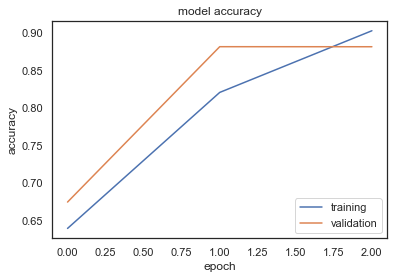

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='lower right')
plt.show()

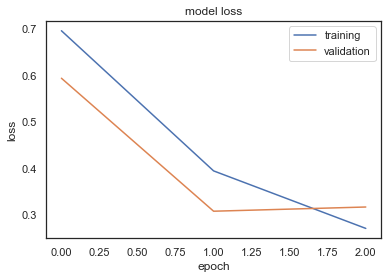

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()

In [ ]:
Y_predictedProba = model.predict(test_padded, verbose=1)[:,0]
Y_predictedClass = model.predict_classes(test_padded, verbose=1)[:,0]

626/626 [==============================] - 6s 10ms/step


In [ ]:
from sklearn import metrics
# accuracy: (tp + tn) / (p + n)
accuracy = metrics.accuracy_score(test_labels, Y_predictedClass)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = metrics.precision_score(test_labels, Y_predictedClass)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = metrics.recall_score(test_labels, Y_predictedClass)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = metrics.f1_score(test_labels, Y_predictedClass)
print('F1 score: %f' % f1)

Accuracy: 0.912168
Precision: 0.926072
Recall: 0.946541
F1 score: 0.936195


In [ ]:
print('Clasification report:\n', metrics.classification_report(test_labels, Y_predictedClass))

Clasification report:
               precision    recall  f1-score   support

           0       0.88      0.84      0.86      6386
           1       0.93      0.95      0.94     13618

    accuracy                           0.91     20004
   macro avg       0.90      0.89      0.90     20004
weighted avg       0.91      0.91      0.91     20004



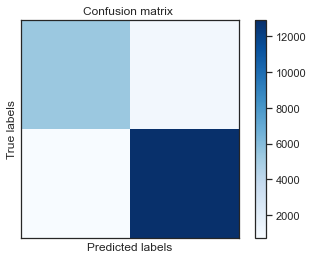

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
cm = metrics.confusion_matrix(test_labels, Y_predictedClass)

plt.imshow(cm, cmap=plt.cm.Blues)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.xticks([], [])
plt.yticks([], [])
plt.title('Confusion matrix ')
plt.colorbar()
plt.show()

In [ ]:
from sklearn.metrics import roc_curve,roc_auc_score
fpr , tpr , thresholds = roc_curve (test_labels, Y_predictedProba)

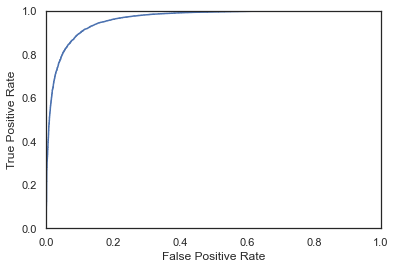

In [ ]:
def plot_roc_curve(fpr,tpr): 
  plt.plot(fpr,tpr) 
  plt.axis([0,1,0,1]) 
  plt.xlabel('False Positive Rate') 
  plt.ylabel('True Positive Rate') 
  plt.show()    
  
plot_roc_curve (fpr,tpr) 

In [ ]:
model_yaml = model.to_yaml()
with open(r'C:/Users/hadia/Desktop/GOALS/VeeSmart internship/NLP/model/model.yaml', "w") as yaml_file:
    yaml_file.write(model_yaml)
    
model.save_weights(r'C:/Users/hadia/Desktop/GOALS/VeeSmart internship/NLP/model/model.h5')

print("Model & weights are saved to disk!")

Model & weights are saved to disk!
